In [1]:
import pandas as pd

In [61]:
%run analysis_utils.py

<Figure size 640x480 with 0 Axes>

In [62]:
# def map_groups(exp):

#     if 'gf' in exp:
#         return 'Geneformer'
#     elif 'Geneformer' in exp:
#         return 'Geneformer'
#     elif 'scfoundation' in exp:
#         return 'Other'
#     elif 'scimilarity' in exp:
#         return 'Other'
#     elif 'scgpt' in exp:
#         return 'scGPT'
#     elif 'cellplm' in exp:
#         return 'Other'
    
#     elif any(x in exp for x in ['hvg', 'pca', 'scvi']):
#         return 'Baseline'
#     else:
#         return 'Other'  # optional fallback

In [63]:
# model_name_map={
# 'hvg': 'HVG',
# 'pca': 'PCA',
# 'scgpt': 'scGPT', 
# 'scgpt_cancer': 'scGPT [cancer]',
# 'scvi':'scVI',
# 'scvi_donor_id':'scVI',
# 'scfoundation':'scFoundation',
# 'scimilarity':'SCimiarity',
# 'cellplm':'CellPLM',
# 'gf-6L-30M-i2048': 'GF-V1',
# 'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
# 'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
# 'Geneformer-V2-104M': 'GF-V2',
# 'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
# 'Geneformer-V2-316M': 'GF-V2-Deep',
# 'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
# 'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

# }

In [64]:
import os
results_path = os.path.abspath('./fig2_metrics/metrics_10_runs.csv')

In [65]:
results_10_runs = pd.read_csv(results_path)

In [66]:
results_10_runs

,method,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
0,Geneformer-V2-104M_continue,0.129519,0.097692,0.450335,0.650714,0.419690,0.722900,0.027858,0.225849,geneformer
1,Geneformer-V2-104M_continue,0.135984,0.102432,0.448726,0.664223,0.416998,0.747465,0.033049,0.229047,geneformer
2,Geneformer-V2-104M_continue,0.130433,0.087637,0.452150,0.644008,0.414649,0.759104,0.031897,0.223407,geneformer
3,Geneformer-V2-104M_continue,0.127309,0.093911,0.446396,0.644266,0.419008,0.739000,0.024874,0.222539,geneformer
4,Geneformer-V2-104M_continue,0.134912,0.098717,0.449302,0.645478,0.412620,0.737268,0.025222,0.227644,geneformer
...,...,...,...,...,...,...,...,...,...,...
135,gf-6L-30M-i2048_continue,0.710987,0.663331,0.499808,0.973431,0.471967,0.870298,0.147988,0.624709,geneformer
136,gf-6L-30M-i2048_continue,0.757802,0.706097,0.504240,0.967576,0.470649,0.884298,0.150742,0.656046,geneformer
137,gf-6L-30M-i2048_continue,0.723683,0.674200,0.516433,0.964077,0.470683,0.877303,0.156095,0.638105,geneformer
138,gf-6L-30M-i2048_continue,0.753129,0.699900,0.502409,0.977541,0.472319,0.872507,0.145492,0.651813,geneformer


In [67]:
results_10_runs.method.value_counts()

method
Geneformer-V2-104M_continue    10
Geneformer-V2-104M_CLcancer    10
hvg                            10
scvi_donor_id                  10
Geneformer-V2-316M             10
Geneformer-V2-104M             10
scgpt_cancer                   10
scfoundation                   10
scgpt                          10
cellplm                        10
scimilarity                    10
pca                            10
gf-6L-30M-i2048                10
gf-6L-30M-i2048_continue       10
Name: count, dtype: int64

In [68]:
ind = results_10_runs.method=='scvi'
results_10_runs = results_10_runs[~ind]

In [69]:
ind = results_10_runs.method.str.startswith('__')
results_10_runs = results_10_runs[~ind]


In [70]:
results_10_runs.method.value_counts()

method
Geneformer-V2-104M_continue    10
Geneformer-V2-104M_CLcancer    10
hvg                            10
scvi_donor_id                  10
Geneformer-V2-316M             10
Geneformer-V2-104M             10
scgpt_cancer                   10
scfoundation                   10
scgpt                          10
cellplm                        10
scimilarity                    10
pca                            10
gf-6L-30M-i2048                10
gf-6L-30M-i2048_continue       10
Name: count, dtype: int64

In [71]:
results_10_runs['group'] =  results_10_runs['method'].map(map_groups)

In [72]:
results_10_runs['method'] =  results_10_runs['method'].map(model_name_map)

In [74]:
results_10_runs.method.value_counts()

method
GF-V2 [continue]    10
GF-V2 [cancer]      10
HVG                 10
scVI                10
GF-V2-Deep          10
GF-V2               10
scGPT [cancer]      10
scFoundation        10
scGPT               10
CellPLM             10
SCimilarity         10
PCA                 10
GF-V1               10
GF-V1 [continue]    10
Name: count, dtype: int64

In [75]:
results_10_runs

,method,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
0,GF-V2 [continue],0.129519,0.097692,0.450335,0.650714,0.419690,0.722900,0.027858,0.225849,Geneformer
1,GF-V2 [continue],0.135984,0.102432,0.448726,0.664223,0.416998,0.747465,0.033049,0.229047,Geneformer
2,GF-V2 [continue],0.130433,0.087637,0.452150,0.644008,0.414649,0.759104,0.031897,0.223407,Geneformer
3,GF-V2 [continue],0.127309,0.093911,0.446396,0.644266,0.419008,0.739000,0.024874,0.222539,Geneformer
4,GF-V2 [continue],0.134912,0.098717,0.449302,0.645478,0.412620,0.737268,0.025222,0.227644,Geneformer
...,...,...,...,...,...,...,...,...,...,...
135,GF-V1 [continue],0.710987,0.663331,0.499808,0.973431,0.471967,0.870298,0.147988,0.624709,Geneformer
136,GF-V1 [continue],0.757802,0.706097,0.504240,0.967576,0.470649,0.884298,0.150742,0.656046,Geneformer
137,GF-V1 [continue],0.723683,0.674200,0.516433,0.964077,0.470683,0.877303,0.156095,0.638105,Geneformer
138,GF-V1 [continue],0.753129,0.699900,0.502409,0.977541,0.472319,0.872507,0.145492,0.651813,Geneformer


In [76]:
results_10_runs = results_10_runs[results_10_runs['method'] != 'GF-V2 [continue]']


In [77]:
nmi_df = results_10_runs[['method', 'NMI_cluster/label', 'group']].copy()
nmi_df.columns= ['method', 'NMI', 'group']

In [78]:
ari_df = results_10_runs[['method', 'ARI_cluster/label', 'group']].copy()
ari_df.columns= ['method', 'ARI', 'group']

In [79]:
asw_df = results_10_runs[['method', 'ASW_label', 'group']].copy()
asw_df.columns= ['method', 'ASW', 'group']

In [80]:
# nmi_df['method'] =  nmi_df['method'].map(model_name_map)

In [81]:
# nmi_df['method'] = nmi_df['method'].map(model_name_map)

In [82]:
nmi_df

,method,NMI,group
10,GF-V2 [cancer],0.633880,Geneformer
11,GF-V2 [cancer],0.687393,Geneformer
12,GF-V2 [cancer],0.635788,Geneformer
13,GF-V2 [cancer],0.676768,Geneformer
14,GF-V2 [cancer],0.620678,Geneformer
...,...,...,...
135,GF-V1 [continue],0.710987,Geneformer
136,GF-V1 [continue],0.757802,Geneformer
137,GF-V1 [continue],0.723683,Geneformer
138,GF-V1 [continue],0.753129,Geneformer


In [83]:
nmi_df.group.unique()

array(['Geneformer', 'Baseline', 'scGPT', 'Other'], dtype=object)

In [84]:
group= 'scGPT'

In [85]:
subset = nmi_df[nmi_df['group'] == group].copy()

In [86]:
subset

,method,NMI,group
60,scGPT [cancer],0.749704,scGPT
61,scGPT [cancer],0.757391,scGPT
62,scGPT [cancer],0.759680,scGPT
63,scGPT [cancer],0.769176,scGPT
64,scGPT [cancer],0.753672,scGPT
65,scGPT [cancer],0.773499,scGPT
66,scGPT [cancer],0.771312,scGPT
67,scGPT [cancer],0.698656,scGPT
68,scGPT [cancer],0.764169,scGPT
69,scGPT [cancer],0.750511,scGPT


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

def plot_metric_by_group_violin(df, metric_col="NMI_cluster/label", title=None, ylim=(0.4, 0.8)):
    """
    Plots a violin plot of the specified metric for each group, with adaptive subplot widths.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with columns 'group', 'method', and the metric.
    - metric_col (str): Column name of the metric to plot.
    - title (str): Optional title for the entire plot.
    - ylim (tuple): Y-axis limits.
    """

    sns.set(style="whitegrid")

    # Get unique groups and method counts
    group_method_counts = df.groupby("group")["method"].nunique()
    total_methods = group_method_counts.sum()

    # Set up figure and grid
    fig = plt.figure(figsize=(6 * len(group_method_counts) / 2, 6))
    gs = gridspec.GridSpec(1, len(group_method_counts), width_ratios=group_method_counts.values, figure=fig)

    for idx, (group, method_count) in enumerate(group_method_counts.items()):
        ax = fig.add_subplot(gs[0, idx])
        subset = df[df['group'] == group].copy()

        # Sort methods by median
        method_stats = subset.groupby("method")[metric_col].median().sort_values(ascending=True)
        ordered_methods = method_stats.index.tolist()
        subset["method"] = pd.Categorical(subset["method"], categories=ordered_methods, ordered=True)

        # Violin plot
        sns.violinplot(
            data=subset,
            x="method",
            y=metric_col,
            ax=ax,
            inner="quartile",
            scale="area",
            width=0.5
        )

        # Line plot for group medians
        stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
        ax.plot(range(len(ordered_methods)), stat_values, marker='o', linestyle='--', color='black', label='Median')

        ax.set_title(f"{group}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_xlabel('')
        ax.set_ylim(*ylim)
        if idx != 0:
            ax.set_yticklabels([])
            ax.set_ylabel("")

    # Final layout and title
    plot_title = title or f"{metric_col} Distribution by Method (Grouped)"
    fig.suptitle(plot_title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.show()
    return fig

In [88]:
group_method_counts = nmi_df.groupby("group")["method"].nunique()
group_method_counts

group
Baseline      3
Geneformer    5
Other         3
scGPT         2
Name: method, dtype: int64

In [89]:
group_method_counts.sort_values(ascending=False)

group
Geneformer    5
Baseline      3
Other         3
scGPT         2
Name: method, dtype: int64

In [90]:
nmi_df[nmi_df.method=='scFoundation']

,method,NMI,group
70,scFoundation,0.699026,Other
71,scFoundation,0.701064,Other
72,scFoundation,0.612494,Other
73,scFoundation,0.707742,Other
74,scFoundation,0.717745,Other
75,scFoundation,0.685823,Other
76,scFoundation,0.708301,Other
77,scFoundation,0.716527,Other
78,scFoundation,0.698837,Other
79,scFoundation,0.723484,Other


/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_26100/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_26100/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipyke

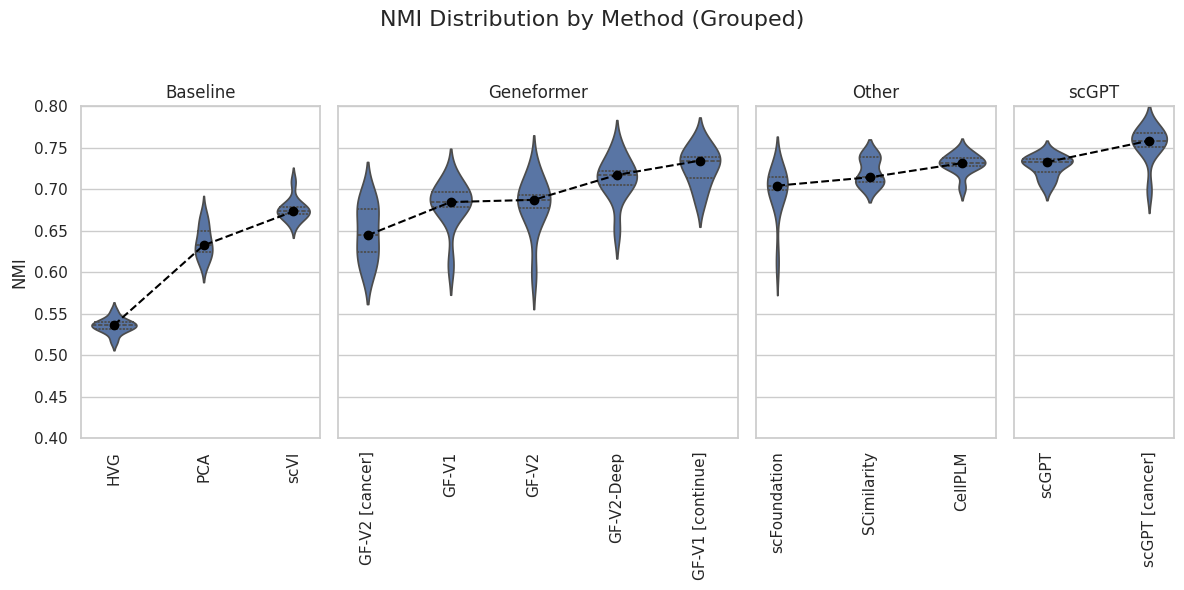

In [91]:
fig = plot_metric_by_group_violin(nmi_df, metric_col="NMI")
plt.savefig('./plots/nmi3.png', dpi=100)


/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_26100/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_26100/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipyke

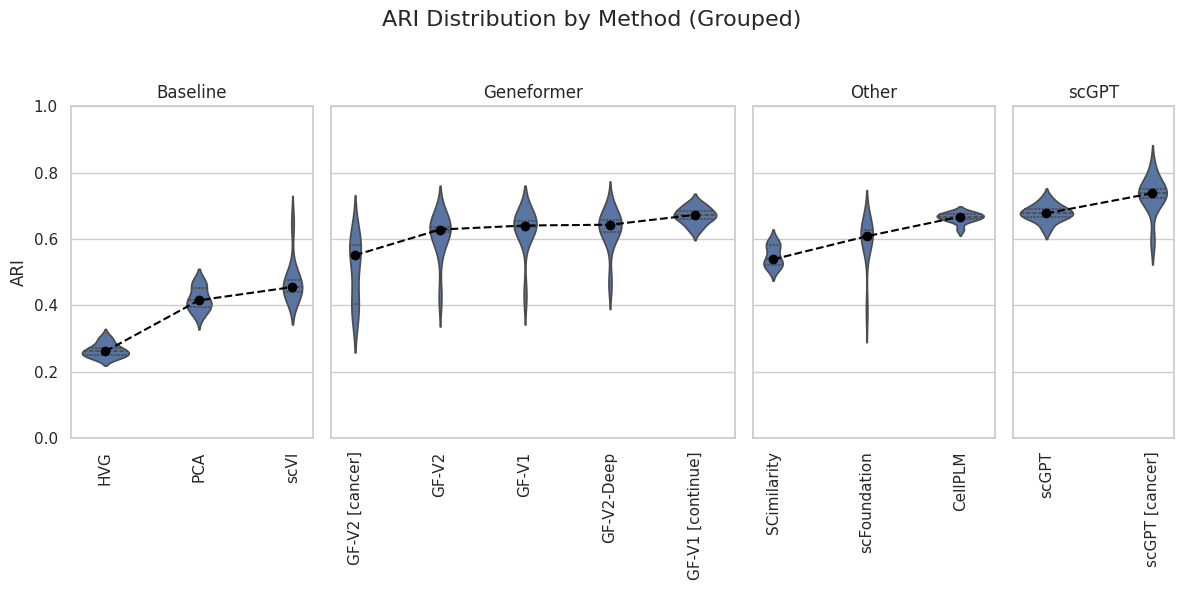

In [92]:
fig = plot_metric_by_group_violin(ari_df, metric_col="ARI", ylim=(0.0, 1.))
plt.savefig('./plots/ari3.png', dpi=100)

/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipykernel_26100/1599706521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_values = subset.groupby("method")[metric_col].median()[ordered_methods].values
/var/tmp/ipykernel_26100/1599706521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_26100/1599706521.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/tmp/ipyke

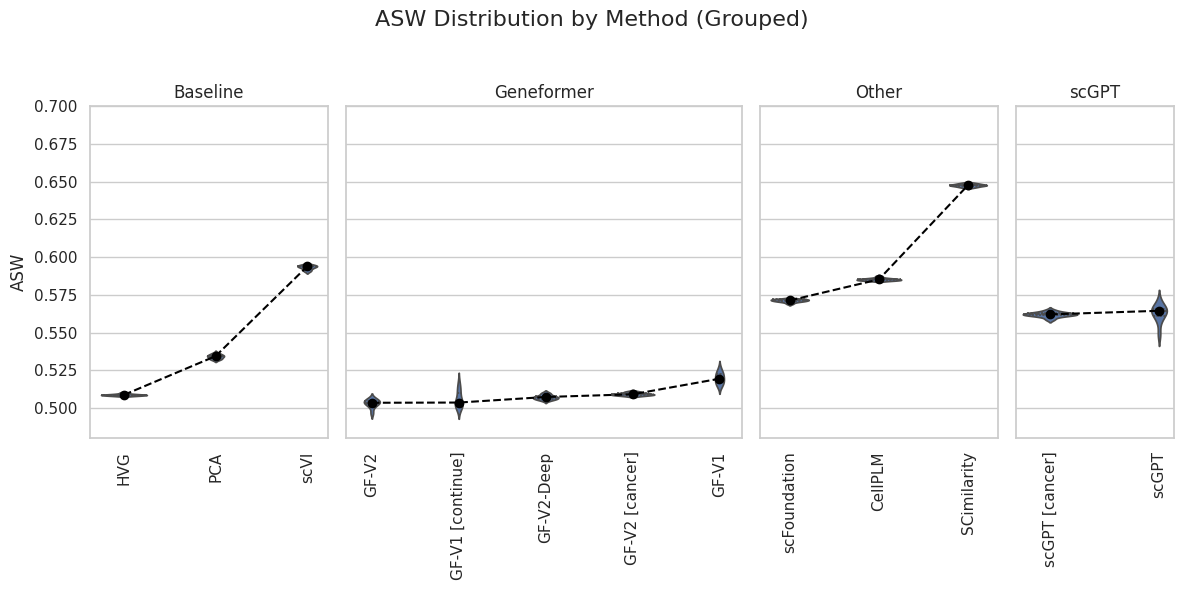

In [93]:
fig = plot_metric_by_group_violin(asw_df, metric_col="ASW", ylim=(0.48, .7))
plt.savefig('./plots/asw3.png', dpi=100)